### Random Search Cross Validation in Scikit-Learn

In [1]:
import pandas as pd
import numpy as np

import copy


data = pd.read_csv('Dataset/itu_Estimted_QoE.csv')
display(data.shape)

display(data.head(5))

(2090, 4)

,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu
0,0,1,5,3.119406
1,1,3,5,4.282069
2,2,2,5,4.278156
3,3,3,5,4.278085
4,4,2,5,4.275066


In [15]:
itu_pred_summary = []

for i in np.arange(1, 4, 1):
    
    if i == 3:
        df_user_fb = copy.deepcopy(data[(data['FEEDBACK_VALUE'] == i+1) | (data['FEEDBACK_VALUE'] == i+2)])
    elif i==2:
        df_user_fb = copy.deepcopy(data[(data['FEEDBACK_VALUE'] == i) | (data['FEEDBACK_VALUE'] == i+1)])
    else:
        df_user_fb = copy.deepcopy(data[data['FEEDBACK_VALUE'] == i])

    col_qoe_itu = df_user_fb['QoE_itu']
    median = np.median(col_qoe_itu)
    mean = np.mean(col_qoe_itu)
    maximum = np.max(col_qoe_itu)
    minimum = np.min(col_qoe_itu)
    Q1 = col_qoe_itu.quantile(.25)
    Q3 = col_qoe_itu.quantile(.75)
    print('Max: %.5f Min: %.5f Median: %.5f Mean: %.5f Q1: %.5f Q3: %.5f' %(maximum, minimum, median, mean, Q1, Q3))
    _temp = [maximum, minimum, median, mean, Q1, Q3]
    itu_pred_summary.append(_temp)

df_summary = pd.DataFrame(itu_pred_summary, columns=['Maximum', 'Minimum', 'Median', 'Mean', 'Q1', 'Q3'], \
                          index=np.arange(1,4, 1))
display(df_summary.head(5))
df_summary.to_csv('Dataset/itu_prediction_summary_group4-5.csv')

Max: 4.27854 Min: 1.54095 Median: 1.94378 Mean: 2.07410 Q1: 1.65706 Q3: 2.20538
Max: 4.28207 Min: 1.58940 Median: 2.20526 Mean: 2.32038 Q1: 1.97002 Q3: 2.50401
Max: 4.28027 Min: 1.58261 Median: 2.48466 Mean: 2.67585 Q1: 2.05442 Q3: 3.42468


,Maximum,Minimum,Median,Mean,Q1,Q3
1,4.278536,1.540953,1.943783,2.074096,1.657063,2.205383
2,4.282069,1.589398,2.205260,2.320378,1.970024,2.504013
3,4.280274,1.582614,2.484660,2.675851,2.054423,3.424679


In [43]:
# FB 1
mos_feedback = 1
df_user_fb_1 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
col_qoe_itu = df_user_fb_1['QoE_itu']
median_1 = np.median(col_qoe_itu)
mean = np.mean(col_qoe_itu)
maximum = np.max(col_qoe_itu)
minimum = np.min(col_qoe_itu)

print('Max: %.5f Min: %.5f Median: %.5f Mean: %.5f' %(maximum, minimum, median_1, mean))

# FB 2
mos_feedback = 2
# df_user_fb_2 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
df_user_fb_2 = copy.deepcopy(data[(data['FEEDBACK_VALUE'] == mos_feedback) | (data['FEEDBACK_VALUE'] == mos_feedback + 1)])

col_qoe_itu = df_user_fb_2['QoE_itu']
median_2 = np.median(col_qoe_itu)
mean_2 = np.mean(col_qoe_itu)
maximum = np.max(col_qoe_itu)
minimum = np.min(col_qoe_itu)

Q1 = col_qoe_itu.quantile(.25)
Q3_2 = col_qoe_itu.quantile(.75)
print('Max: %.5f Min: %.5f Median: %.5f Mean_2: %.5f Q1: %.5f Q3_23: %.5f' %(maximum, minimum, median_2, mean_2, Q1, Q3_2))

# FB 4
mos_feedback = 4
df_user_fb_4 = copy.deepcopy(data[(data['FEEDBACK_VALUE'] == mos_feedback) | (data['FEEDBACK_VALUE'] == mos_feedback + 1)])

col_qoe_itu = df_user_fb_4['QoE_itu']
median = np.median(col_qoe_itu)
mean = np.mean(col_qoe_itu)
maximum = np.max(col_qoe_itu)
minimum = np.min(col_qoe_itu)

Q1 = col_qoe_itu.quantile(.25)
Q3_3 = col_qoe_itu.quantile(.75)

print('Max: %.5f Min: %.5f Median: %.5f Mean: %.5f Q1: %.5f Q3_45: %.5f' %(maximum, minimum, median, mean, Q1, Q3_3))

Max: 4.27854 Min: 1.54095 Median: 1.94378 Mean: 2.07410
Max: 4.28207 Min: 1.58940 Median: 2.20526 Mean_2: 2.32038 Q1: 1.97002 Q3_23: 2.50401
Max: 4.28027 Min: 1.58261 Median: 2.48466 Mean: 2.67585 Q1: 2.05442 Q3_45: 3.42468


In [33]:
def _map_class_1(X_target):
    """ Convert string to float
    """
    
    if X_target < median_1:
        return 1
    #elif X_target >= median_1 and X_target <= Q3_2:
    elif X_target >= median_1 and X_target <= mean_2:
        return 2
    elif X_target > mean_2 and X_target <= Q3_3:
        return 3
    elif X_target > Q3_3 and X_target <= 4.5:
        return 4
    elif X_target > 4.5:
        return 5

df_user_fb_1['itu_QoE_Class'] = df_user_fb_1['QoE_itu'].apply(lambda x: str(_map_class_1(x)))
groupby_itu_cl_1 = df_user_fb_1.groupby(['itu_QoE_Class']).count().reset_index()

#display(df_user_fb_1.head(5))

groupby_itu_cl_1['Frequency %'] = groupby_itu_cl_1['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_1['FEEDBACK_VALUE'])
groupby_itu_cl_1['MoS_Feedback'] = str(1)

display(groupby_itu_cl_1.head(5))

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1,137,137,137,137,0.500000,1
1,2,89,89,89,89,0.324818,1
2,3,34,34,34,34,0.124088,1
3,4,14,14,14,14,0.051095,1


### User Feedback 2

In [45]:
def _map_class_2(X_target):
    """ Convert string to float
    """
    if X_target < median_1:
        return 1
    #elif X_target >= median_1 and X_target <= Q3_2:
    elif X_target >= median_2 and X_target <= Q3_2:
        return 2
    elif X_target > Q3_2 and X_target <= Q3_3:
        return 3
    elif X_target > Q3_3 and X_target <= 4.5:
        return 4
    elif X_target > 4.5:
        return 5
        

df_user_fb_2['itu_QoE_Class'] = df_user_fb_2['QoE_itu'].apply(lambda x: str(_map_class_2(x)))
groupby_itu_cl_2 = df_user_fb_2.groupby(['itu_QoE_Class']).count().reset_index()

#display(df_user_fb_2.head(5))

groupby_itu_cl_2['Frequency %'] = groupby_itu_cl_2['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_2['FEEDBACK_VALUE']) 
groupby_itu_cl_2['MoS_Feedback'] = str('2&3')

display(groupby_itu_cl_2.head(5))

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1,83,83,83,83,0.213368,2&3
1,2,110,110,110,110,0.282776,2&3
2,3,62,62,62,62,0.159383,2&3
3,4,35,35,35,35,0.089974,2&3
4,None,99,99,99,99,0.254499,2&3


### User Feedback 4 and 5

In [36]:
def _map_class_4(X_target):
    """ Convert string to float
    """
    
    if X_target < median_1:
        return 1
    #elif X_target >= median_1 and X_target <= Q3_2:
    elif X_target >= median_1 and X_target <= mean_2:
        return 2
    elif X_target > mean_2 and X_target <= Q3_3:
        return 3
    elif X_target > Q3_3 and X_target <= 4.5:
        return 4
    elif X_target > 4.5:
        return 5

df_user_fb_4['itu_QoE_Class'] = df_user_fb_4['QoE_itu'].apply(lambda x: str(_map_class_4(x)))

groupby_itu_cl_4 = df_user_fb_4.groupby(['itu_QoE_Class']).count().reset_index()

groupby_itu_cl_4['Frequency %'] = groupby_itu_cl_4['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_4['FEEDBACK_VALUE'])
groupby_itu_cl_4['MoS_Feedback'] = str(4) + '&' + str(4+1)

display(groupby_itu_cl_4.head(5))

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1,246,246,246,246,0.172390,4&5
1,2,376,376,376,376,0.263490,4&5
2,3,455,455,455,455,0.318851,4&5
3,4,350,350,350,350,0.245270,4&5


In [39]:
def _convert_class_str(X_target):
    """ Convert string to float
    """
    return 'MoS_' + str(X_target)

display(_convert_class_str(1))

'MoS_1'

In [40]:
# df_itus = []
# for i in np.arange(1, 6, 1):
#     df_itus.append(pd.DataFrame('groupby_itu_cl_' + str(i)))
    
# print(df_itus)

#df_itus = [groupby_itu_cl_1, groupby_itu_cl_2, groupby_itu_cl_3, groupby_itu_cl_4]
df_itus = [groupby_itu_cl_1, groupby_itu_cl_2, groupby_itu_cl_4]
df_itu_qoe_class = pd.concat(df_itus)

# Convert MoS to string
df_itu_qoe_class['MoS_Feedback_Class'] = df_itu_qoe_class['MoS_Feedback'].apply(lambda x: _convert_class_str(x))

# Round Freq to 2 decimals
df_itu_qoe_class['Frequency_Round %'] = np.round(df_itu_qoe_class['Frequency %'], 2)


display(df_itu_qoe_class)

# Pivot DF
df_MoS_Feedback_IUT_QoE_Class = pd.pivot_table(df_itu_qoe_class, values='Frequency_Round %', columns=['itu_QoE_Class'], index=['MoS_Feedback_Class'])


#df_MoS_Feedback_IUT_QoE_Class['5'] = float("{0:.6f}".format(0.0))

display(df_MoS_Feedback_IUT_QoE_Class)

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback,MoS_Feedback_Class,Frequency_Round %
0,1,137,137,137,137,0.500000,1,MoS_1,0.50
1,2,89,89,89,89,0.324818,1,MoS_1,0.32
2,3,34,34,34,34,0.124088,1,MoS_1,0.12
3,4,14,14,14,14,0.051095,1,MoS_1,0.05
0,1,83,83,83,83,0.213368,2&3,MoS_2&3,0.21
1,2,183,183,183,183,0.470437,2&3,MoS_2&3,0.47
2,3,88,88,88,88,0.226221,2&3,MoS_2&3,0.23
3,4,35,35,35,35,0.089974,2&3,MoS_2&3,0.09
0,1,246,246,246,246,0.172390,4&5,MoS_4&5,0.17
1,2,376,376,376,376,0.263490,4&5,MoS_4&5,0.26


itu_QoE_Class,1,2,3,4
MoS_Feedback_Class,,,,
MoS_1,0.50,0.32,0.12,0.05
MoS_2&3,0.21,0.47,0.23,0.09
MoS_4&5,0.17,0.26,0.32,0.25


In [41]:
df_MoS_Feedback_IUT_QoE_Class.to_csv('Dataset/MoS_Feedback_IUT_QoE_Class_Group4-5.csv')

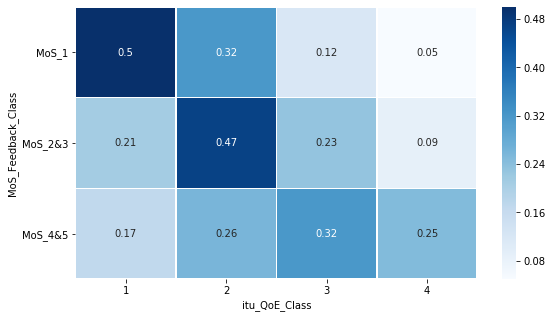

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plot heatmap
plt.figure(figsize=(9,5))
ax = sns.heatmap(df_MoS_Feedback_IUT_QoE_Class, annot=True, linewidths=.5, cmap='Blues')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)

plt.show()